# Analysing network based skill diversity

In [1]:
import numpy as np
import ast
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df = pd.read_json("final_data.json")

In [20]:
# Exclude everything above 8?
df.skill_diversity.value_counts()

1     387535
2     209491
3     110687
4      31211
5       7360
6       1862
7        494
8        113
9         15
10         4
Name: skill_diversity, dtype: int64

In [22]:
# Exclude everything above 30 ? 
df.skill_count.value_counts()

3      118558
2      117453
1      111836
4       98469
5       95463
        ...  
55          1
84          1
88          1
98          1
106         1
Name: skill_count, Length: 77, dtype: int64

# 1. Static

## 1.1 Mean skill diversity overall

In [92]:
df.skill_diversity.median()

1.0

In [94]:
#sns.distplot(df["skill_diversity"])

In [30]:
total = df.shape[0]

# % 1 cluster
print("1 cluster:",(387535/total)*100)
# % 2 cluster
print("2 cluster",(209491/total)*100)
# % 3 cluster
print("3 cluster",(110687/total)*100)
# % 4 cluster
print("4 cluster",(31211/total)*100)
# % more than 4
print("more than 4 cluster",(9848/total)*100)

1 cluster: 51.75607528059276
2 cluster 27.977942551270612
3 cluster 14.78247049836265
4 cluster 4.1682915493634916
more than 4 cluster 1.3152201204104854


In [48]:
# skill diversity by year
year = df.groupby(['year'],as_index=False) \
       .agg({'date_2':'size',"skill_diversity":"mean","adj_rate":"median"})
year

,year,date_2,skill_diversity,adj_rate
0,2016,43496,1.673326,29.0
1,2017,263687,1.761911,27.9
2,2018,163779,1.743423,28.2
3,2019,277808,1.774665,28.7


## 1.2 Skill diversity by skill level

In [39]:
num_skill = df.groupby(['skill_level'],as_index=False) \
       .agg({'date_2':'size',"skill_diversity":"mean","adj_rate":"median"})
num_skill.sort_values(by='skill_diversity',ascending=False)

,skill_level,date_2,skill_diversity,adj_rate
0,high,302932,1.912548,30.1
1,low,124604,1.908952,20.5
2,medium,225879,1.703465,29.6


## 1.3 Skill diversity by job category

In [44]:
num_skill = df.groupby(['category_1'],as_index=False) \
       .agg({'date_2':'size',"num_projects":"size","skill_diversity":"mean","adj_rate":"median"})
num_skill.sort_values(by='skill_diversity',ascending=False)

,category_1,date_2,num_projects,skill_diversity,adj_rate
2,Customer Service,13095,13095,2.484383,15.8
1,Admin Support,71147,71147,2.219110,16.2
8,Sales & Marketing,124417,124417,1.927647,28.4
10,"Web, Mobile & Software Dev",237810,237810,1.920294,29.4
11,Writing,66344,66344,1.647609,31.1
6,IT & Networking,27457,27457,1.620971,40.6
3,Data Science & Analytics,23104,23104,1.568819,36.2
4,Design & Creative,115260,115260,1.332795,28.9
0,Accounting & Consulting,19407,19407,1.327768,33.5
5,Engineering & Architecture,21302,21302,1.196085,32.5


In [45]:
num_skill = num_skill.sort_values(by='num_projects',ascending=False)

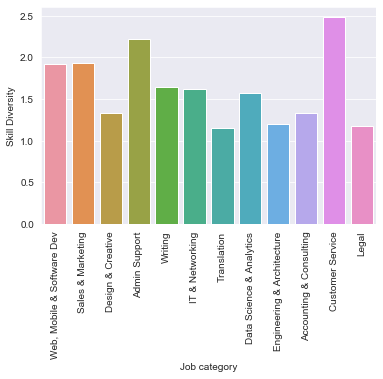

In [46]:
sns.set_style("darkgrid")
chart = sns.barplot(x="category_1", y="skill_diversity", data=num_skill)
chart.set_xticklabels(rotation=90, labels=num_skill.category_1)
chart.set_xlabel('Job category')
chart.set_ylabel('Skill Diversity')
#plt.savefig('skill_diversity_category1.png',dpi=300,bbox_inches = "tight")

# 2. Dynamic (over time)

## 2.1 Overall skill diversity by quarter

In [53]:
quarter = df.groupby(['quarter_year'],as_index=False) \
       .agg({'date_2':'size',"skill_diversity":"mean"}) \
       .rename(columns={'date_2':'count', 'skill_diversity':'mean_skill_diversity'})

,quarter_year,count,mean_skill_diversity
0,2016Q1,4,2.250000
1,2016Q2,4,2.250000
2,2016Q3,13558,1.671338
3,2016Q4,29930,1.674073
4,2017Q1,35546,1.728549
5,2017Q2,64667,1.745048
6,2017Q3,89514,1.767243
7,2017Q4,73960,1.786236
8,2018Q1,46335,1.736700
9,2018Q2,41763,1.729641


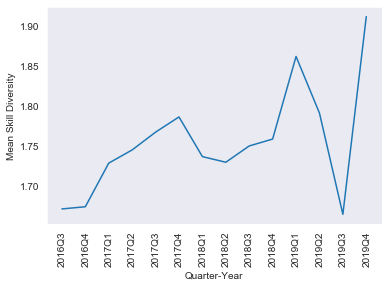

In [57]:
sns.set_style("dark")
ax = sns.lineplot(x='quarter_year', y='mean_skill_diversity',
             data=quarter[quarter["count"]>4])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=quarter[quarter["count"]>4].quarter_year)
plt.xlabel("Quarter-Year")
plt.ylabel("Mean Skill Diversity")
#plt.savefig('skill_diversity_quarterly_total.png',dpi=300,bbox_inches = "tight")

## 2.2 Skill diversity by skill level over time

In [95]:
quarter = df.groupby(["skill_level",'quarter_year'],as_index=False) \
       .agg({'date_2':'size',"skill_diversity":"mean"}) \
       .rename(columns={'date_2':'count', 'skill_diversity':'mean_skill_diversity'})

In [98]:
quarter.tail(50)

,skill_level,quarter_year,count,mean_skill_diversity
0,high,2016Q1,1,1.000000
1,high,2016Q2,1,2.000000
2,high,2016Q3,5526,1.803474
3,high,2016Q4,12305,1.805933
4,high,2017Q1,14182,1.840220
5,high,2017Q2,25908,1.863131
6,high,2017Q3,36104,1.907517
7,high,2017Q4,30455,1.936398
8,high,2018Q1,19513,1.890893
9,high,2018Q2,17640,1.885714


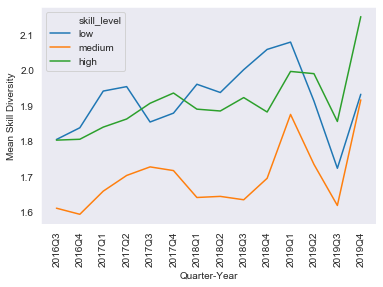

In [61]:
sns.set_style("dark")
ax = sns.lineplot(x='quarter_year', y='mean_skill_diversity', hue="skill_level", hue_order = ["low","medium","high"],
             data=quarter[quarter["count"]>4])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=quarter[quarter["count"]>4].quarter_year)
plt.xlabel("Quarter-Year")
plt.ylabel("Mean Skill Diversity")
#plt.savefig('skill_diversity_quarterly_level.png',dpi=300,bbox_inches = "tight")

## 2.3 Skill diversity by job category over time

In [67]:
quarter = df.groupby(["category_1",'quarter_year'],as_index=False) \
       .agg({'date_2':'size',"skill_diversity":"mean",'num_projects':'size'}) \
       .rename(columns={'date_2':'count', 'skill_diversity':'mean_skill_diversity'})

In [68]:
quarter = quarter.sort_values(by='num_projects',ascending=False)

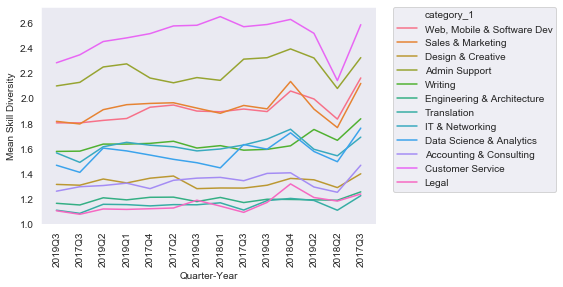

In [70]:
sns.set_style("dark")
ax = sns.lineplot(x='quarter_year', y='mean_skill_diversity', hue="category_1",
             data=quarter[quarter["count"]>4])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=quarter[quarter["count"]>4].quarter_year)
plt.xlabel("Quarter-Year")
plt.ylabel("Mean Skill Diversity")
#plt.savefig('skill_diversity_quarterly_category.png',dpi=300,bbox_inches = "tight")

# 3. Static - Specialization

## 3.1 Overview

In [77]:
df.specialization.mean()

3.3876343870614476

In [78]:
# skill diversity by year
year = df.groupby(['year'],as_index=False) \
       .agg({'date_2':'size',"specialization":"mean","adj_rate":"median"})
year

,year,date_2,specialization,adj_rate
0,2016,43496,2.732136,29.0
1,2017,263687,3.079374,27.9
2,2018,163779,3.064813,28.2
3,2019,277808,3.973172,28.7


## 3.2 Specialization by skill level

In [79]:
num_skill = df.groupby(['skill_level'],as_index=False) \
       .agg({'date_2':'size',"specialization":"mean","adj_rate":"median"})
num_skill.sort_values(by='specialization',ascending=False)

,skill_level,date_2,specialization,adj_rate
2,medium,225879,3.482838,29.6
1,low,124604,3.368527,20.5
0,high,302932,3.295063,30.1


## 3.3 Specialization by job category

In [80]:
num_skill = df.groupby(['category_1'],as_index=False) \
       .agg({'date_2':'size',"num_projects":"size","specialization":"mean","adj_rate":"median"})
num_skill.sort_values(by='specialization',ascending=False)

,category_1,date_2,num_projects,specialization,adj_rate
0,Accounting & Consulting,19407,19407,4.348328,33.5
8,Sales & Marketing,124417,124417,3.787802,28.4
4,Design & Creative,115260,115260,3.666233,28.9
11,Writing,66344,66344,3.540607,31.1
5,Engineering & Architecture,21302,21302,3.475214,32.5
2,Customer Service,13095,13095,3.350974,15.8
10,"Web, Mobile & Software Dev",237810,237810,3.328868,29.4
1,Admin Support,71147,71147,3.125810,16.2
9,Translation,23545,23545,3.035591,25.8
7,Legal,5882,5882,2.842401,62.1


In [81]:
num_skill = num_skill.sort_values(by='num_projects',ascending=False)

Text(0, 0.5, 'Specialization')

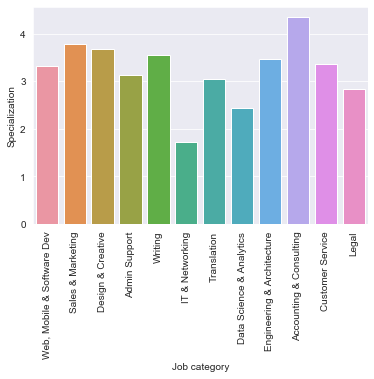

In [82]:
sns.set_style("darkgrid")
chart = sns.barplot(x="category_1", y="specialization", data=num_skill)
chart.set_xticklabels(rotation=90, labels=num_skill.category_1)
chart.set_xlabel('Job category')
chart.set_ylabel('Specialization')
#plt.savefig('skill_diversity_category1.png',dpi=300,bbox_inches = "tight")

# 4. Dynamic (over time)

## 4.1 Overall specialization by quarter

In [83]:
quarter = df.groupby(['quarter_year'],as_index=False) \
       .agg({'date_2':'size',"specialization":"mean"}) \
       .rename(columns={'date_2':'count', 'specialization':'mean_specialization'})

Text(0, 0.5, 'Mean Specialization')

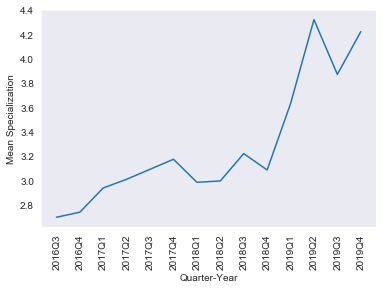

In [84]:
sns.set_style("dark")
ax = sns.lineplot(x='quarter_year', y='mean_specialization',
             data=quarter[quarter["count"]>4])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=quarter[quarter["count"]>4].quarter_year)
plt.xlabel("Quarter-Year")
plt.ylabel("Mean Specialization")
#plt.savefig('skill_diversity_quarterly_total.png',dpi=300,bbox_inches = "tight")

## 4.2 Specialization by skill level over time

In [87]:
quarter = df.groupby(["skill_level",'quarter_year'],as_index=False) \
       .agg({'date_2':'size',"specialization":"mean"}) \
       .rename(columns={'date_2':'count', 'specialization':'mean_specialization'})

Text(0, 0.5, 'Mean Specialization')

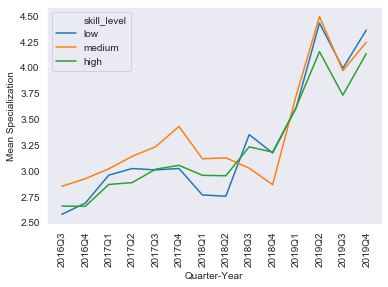

In [88]:
sns.set_style("dark")
ax = sns.lineplot(x='quarter_year', y='mean_specialization', hue="skill_level", hue_order = ["low","medium","high"],
             data=quarter[quarter["count"]>4])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=quarter[quarter["count"]>4].quarter_year)
plt.xlabel("Quarter-Year")
plt.ylabel("Mean Specialization")
#plt.savefig('skill_diversity_quarterly_level.png',dpi=300,bbox_inches = "tight")

## 4.3 Specialization by job category over time

In [89]:
quarter = df.groupby(["category_1",'quarter_year'],as_index=False) \
       .agg({'date_2':'size',"specialization":"mean",'num_projects':'size'}) \
       .rename(columns={'date_2':'count', 'specialization':'mean_specialization'})

In [90]:
quarter = quarter.sort_values(by='num_projects',ascending=False)

Text(0, 0.5, 'Mean Specialization')

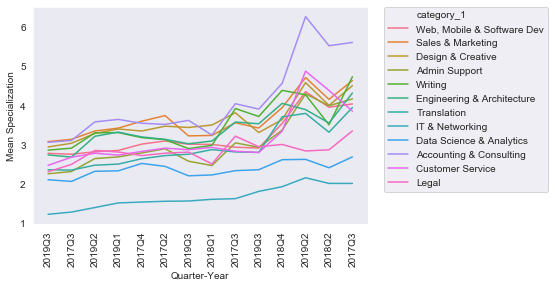

In [91]:
sns.set_style("dark")
ax = sns.lineplot(x='quarter_year', y='mean_specialization', hue="category_1",
             data=quarter[quarter["count"]>4])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=quarter[quarter["count"]>4].quarter_year)
plt.xlabel("Quarter-Year")
plt.ylabel("Mean Specialization")
#plt.savefig('skill_diversity_quarterly_category.png',dpi=300,bbox_inches = "tight")